In [8]:
library(tidyverse)

theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Descriptive statistics

## Distribution

In [53]:
df <- read_tsv("1-02_hiking-data.csv")

df <- df %>% mutate(i = row_number())
# df

Parsed with column specification:
cols(
  distance = col_double(),
  elevation = col_character()
)


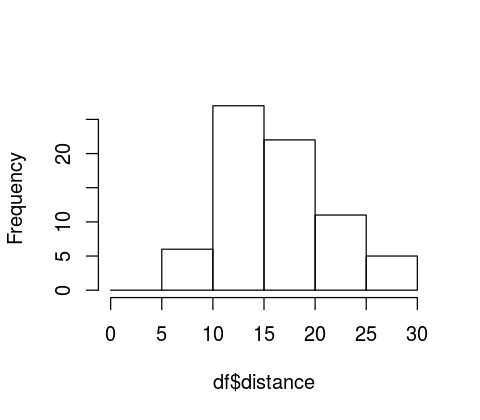

In [4]:
options(repr.plot.width=4, repr.plot.height=3.5)

hist(df$distance,seq(0,30,5),main = NULL)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


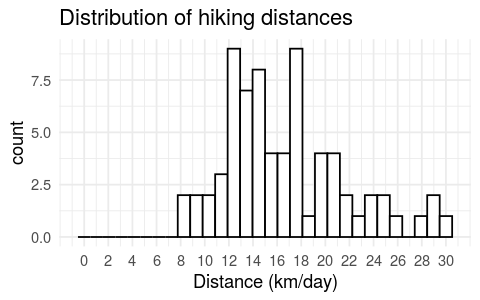

In [57]:
options(repr.plot.width=4, repr.plot.height=2.5)

ggplot(df, aes(x = distance)) +
geom_histogram(color = "black", fill="white") +
scale_x_continuous(breaks = seq(0,30,2)) + expand_limits(x=0) +
labs(title = "Distribution of hiking distances", x = "Distance (km/day)")

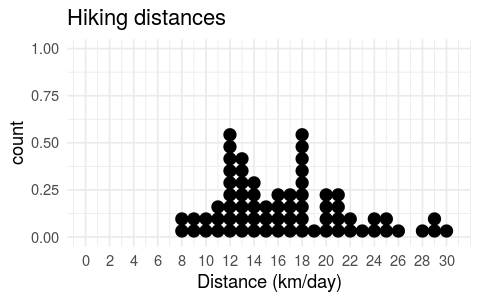

In [14]:
options(repr.plot.width=4, repr.plot.height=2.5)

ggplot(df, aes(x = distance)) +
geom_dotplot(method="histodot", binwidth=1) +
scale_x_continuous(breaks = seq(0,30,2)) + expand_limits(x=0) +
labs(title = "Hiking distances", x = "Distance (km/day)")

## Central tendency (*aka* location)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


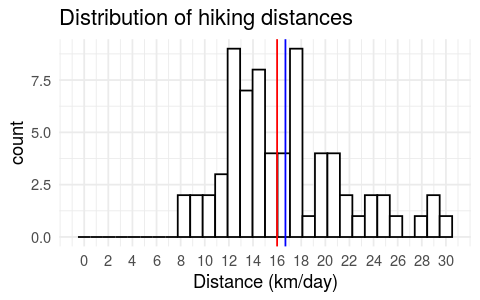

In [61]:
# LOCATION

options(repr.plot.width=4, repr.plot.height=2.5)

ggplot(df, aes(x = distance)) +
geom_histogram(color = "black", fill="white") +
geom_vline(xintercept = mean(df$distance), color = "blue") +
geom_vline(xintercept = median(df$distance), color = "red") +
scale_x_continuous(breaks = seq(0,30,2)) + expand_limits(x=0) +
labs(title = "Distribution of hiking distances", x = "Distance (km/day)")

## Dispersion (*aka* variability, spread)

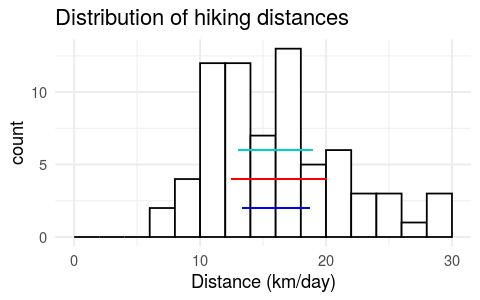

In [64]:
# DISPERSION

options(repr.plot.width=4, repr.plot.height=2.5)

ggplot(df, aes(x = distance)) +
geom_histogram(breaks = seq(0,30,2), color = "black", fill="white") +
geom_segment(x = median(df$distance) - sd(df$distance)/2, xend = median(df$distance) + sd(df$distance)/2,
             y = 2, yend = 2, color = "blue") +
geom_segment(x = quantile(df$distance, probs=seq(0, 1, 0.25))[2], xend = quantile(df$distance, probs=seq(0, 1, 0.25))[4],
             y = 4, yend = 4, color = "red") +
geom_segment(x = median(df$distance) - mad(df$distance)/2, xend = median(df$distance) + mad(df$distance)/2,
             y = 6, yend = 6, color = "darkturquoise") +

# geom_hline(yintercept = 10) +
labs(title = "Distribution of hiking distances", x = "Distance (km/day)")

In [71]:
sd(df$distance)
mad(df$distance)

[1] 5.306577

[1] 5.9304

# Probability mass functions

## Coin toss

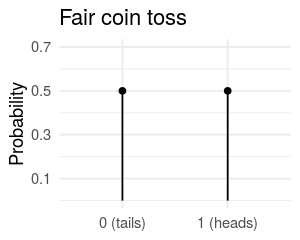

In [138]:
df = data.frame(x = c("0 (tails)","1 (heads)"), proba = rep(.5,2))

options(repr.plot.width=2.5, repr.plot.height=2)

ggplot(df, aes(x = x, xend = x, yend = proba)) +
geom_point(aes(y = proba)) + 
geom_segment(aes(y = 0)) +
scale_y_continuous(breaks = seq(.1,.7,.2)) + expand_limits(y=.7) +
labs(y = "Probability", title = "Fair coin toss") +
# labs(title = "Probability mass function of the coin toss") +
theme(axis.title.x = element_blank())

## Unfair coin toss

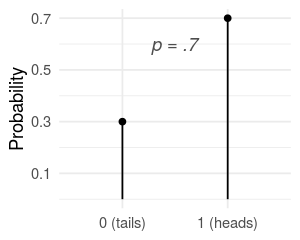

In [190]:
df = data.frame(x = c("0 (tails)","1 (heads)"), proba = c(.3,.7))

options(repr.plot.width=2.5, repr.plot.height=2)

ggplot(df, aes(x = x, xend = x, yend = proba)) +
geom_point(aes(y = proba)) + 
geom_segment(aes(y = 0)) +
annotate(geom = "text", label = "p = .7", x = 1.5, y = .6, color = "grey30", hjust=.5, fontface = "italic") +
scale_y_continuous(breaks = seq(.1,.7,.2)) + expand_limits(y=.7) +
labs(y = "Probability") +
# labs(title = "Unfair coin ~ Ber(0.7)") +
theme(axis.title.x = element_blank())

## Dice

In [153]:
df = data.frame(x = seq(1,6), proba = rep(1/6,6))

options(repr.plot.width=3, repr.plot.height=2)

ggplot(df, aes(x = x, xend = x, yend = proba)) +
geom_point(aes(y = proba)) + 
geom_segment(aes(y = 0)) +
scale_x_continuous(breaks = df$x) +
scale_y_continuous(breaks = c(0,1/6), labels = c(0,"1/6")) +
labs(y = "Probability") +
# labs(title = "Dice ~ Categorical distribution", subtitle = "a.k.a. multinouilli distribution") +
theme(axis.title.x = element_blank())

## Binomial

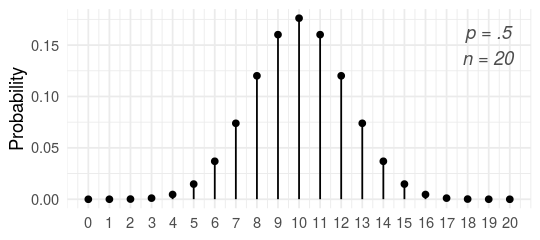

In [218]:
n = 20
df = data.frame(x = seq(0,n), proba = dbinom(x = seq(0,n), size = 20, p =.5))

options(repr.plot.width=4.5, repr.plot.height=2)

ggplot(df, aes(x = x, xend = x, yend = proba)) +
geom_point(aes(y = proba)) + 
geom_segment(aes(y = 0)) +
scale_x_continuous(breaks = df$x) +
annotate(geom = "text", label = "p = .5\nn = 20", x = 19, y = .15, color = "grey30", hjust=0.5, fontface = "italic") +
labs(y = "Probability") +
# labs(title = "Dice ~ Categorical distribution", subtitle = "a.k.a. multinouilli distribution") +
theme(axis.title.x = element_blank())

## Poisson

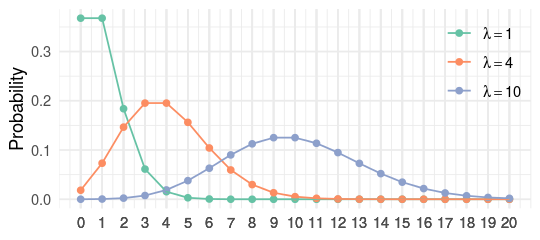

In [222]:
n = 20
df = data.frame()
for (lambda in c(1,4,10)) {
     df = bind_rows(df, data.frame(x = seq(0,n), proba = dpois(x = seq(0,n), lambda = lambda), lambda = lambda))
}

options(repr.plot.width=4.5, repr.plot.height=2)

ggplot(df, aes(x = x, y = proba, color = as.factor(lambda))) +
geom_point() + 
geom_line() +
scale_x_continuous(breaks = df$x) +
scale_color_brewer(palette = "Set2", labels =  list(bquote(lambda==1),bquote(lambda==4),bquote(lambda==10))) +
labs(y = "Probability", color="") +
theme(axis.title.x = element_blank(),
      legend.position = c(.9,.8))

# Probability density functions

## Uniform distribution

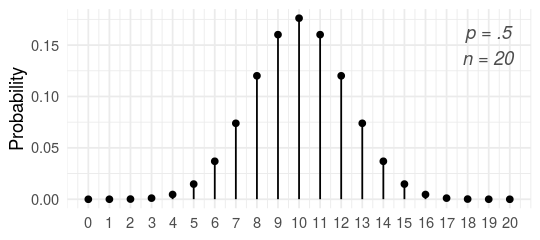

In [218]:
n = 20
df = data.frame(x = seq(0,n), proba = dbinom(x = seq(0,n), size = 20, p =.5))

options(repr.plot.width=4.5, repr.plot.height=2)

ggplot(df, aes(x = x, xend = x, yend = proba)) +
geom_point(aes(y = proba)) + 
geom_segment(aes(y = 0)) +
scale_x_continuous(breaks = df$x) +
annotate(geom = "text", label = "p = .5\nn = 20", x = 19, y = .15, color = "grey30", hjust=0.5, fontface = "italic") +
labs(y = "Probability") +
# labs(title = "Dice ~ Categorical distribution", subtitle = "a.k.a. multinouilli distribution") +
theme(axis.title.x = element_blank())

# Central limit theorem

In [ ]:
rnorm
rpois

In [65]:
df = data.frame()
df_gauss = data.frame()
N = 100000
for (n in c(1,2,5,20,100)) {
    X = vector("integer",N)
    for (k in 1:N) {
        X[k] = sum(rdunif(n, a=1, b=6))
    }
    df = bind_rows(df, data.frame(x = X, dice = n))
    
    m = mean(X)
    s = sd(X)
    df_gauss = bind_rows(df_gauss, data.frame(x = seq(floor(m-4*s),ceiling(m+4*s)),
                                              y = N*dnorm(x = seq(floor(m-4*s),ceiling(m+4*s)), mean = m, sd = s),
                                              dice = n) %>% filter(x >= min(X), x <= max(X)))
}

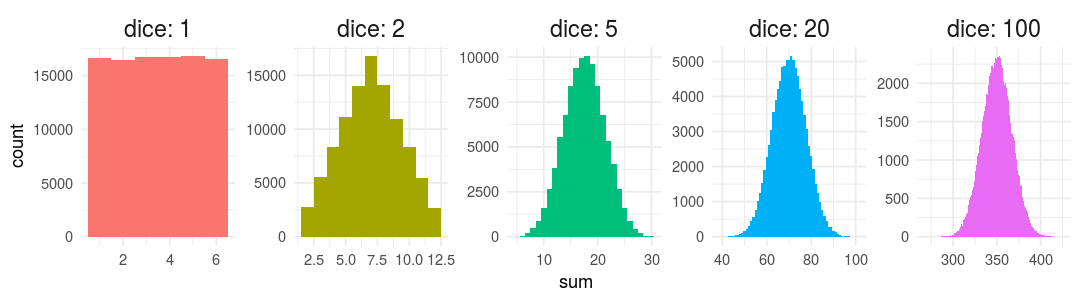

In [299]:
options(repr.plot.width=9, repr.plot.height=2.5)

ggplot(df, aes(x = x, fill = as.factor(dice))) +
facet_wrap( ~ dice, scales = "free", nrow = 1, labeller = label_both) +
geom_histogram(binwidth = 1) +
# geom_line(data = df_gauss, aes(y = y)) +
guides(fill=F) +
labs(x = "sum") +
theme(strip.text = element_text(size = 14))

ggplot(df, aes(x = x, fill = as.factor(dice))) +
facet_wrap( ~ dice, scales = "free", nrow = 1, labeller = label_both) +
geom_histogram(binwidth = 1) +
geom_line(data = df_gauss, aes(y = y)) +
guides(fill=F) +
labs(x = "sum") +
theme(strip.text = element_text(size = 14))

# Parameter estimation

## Visualization

In [66]:
x = c(14.976, 7.04, 11.588, 14.46, 6.876, 9.258, 10.444, 5.425,  12.508, 11.844, 7.695, 4.642, 6.916, 2.947, 10.423, 9.558, 10.783)

options(repr.plot.width=4, repr.plot.height=2.5)

ggplot(data.frame(x = x), aes(x = x)) +
geom_histogram(binwidth = 2) +
labs(x = "NeoSlime's marsworms length (in mm)")

## Summary statistics

In [67]:
summary(x)
mean(x)
sd(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.947   6.916   9.558   9.258  11.588  14.976 

[1] 9.257824

[1] 3.372351

## Population mean estimate: simulations

In [110]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate many many many samples of 17 martian worms
K = 10000 # number of replications
n = 17 # sample size
x_mean = vector("numeric", K) # initialize an empty vector where to store samples' means

for (i in 1:K) {
    x = rnorm(n, mean = mu, sd = sigma) # draw a random sample of n observations
    x_mean[i] = mean(x) # store the i-th sample mean
}

ggplot(data.frame(x = x_mean), aes(x = x)) +
geom_histogram(binwidth = 0.2, center = 9, fill = "grey70") +
geom_vline(xintercept = mu, color = "purple") +
geom_vline(xintercept = mean(x_mean), color = "blue", linetype = 2) +
scale_x_continuous(breaks = seq(6,12)) + expand_limits(x=c(6,12)) +
annotate(geom = "text", label = "mean estimate", x = mu, y = Inf, hjust = 1.1, vjust = 1.1, color = "blue") +
annotate(geom = "text", label = "population", x = mu, y = Inf, hjust = -.1, vjust = 1.1, color = "purple") +
labs(x = "Samples' means")

mean(x_mean)
sd(x_mean)

[1] 9.00415

[1] 0.7255727

## Population variance estimate: simulations

[1] 8.512158

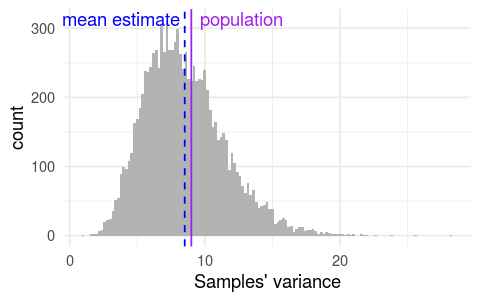

In [108]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate many many many samples of 17 martian worms
K = 10000 # number of replications
n = 17 # sample size
v = vector("numeric", K) # initialize an empty vector where to store samples' variances

for (i in 1:K) {
    x = rnorm(n, mean = mu, sd = sigma) # draw a random sample of n observations
    
    # Natural estimators
    v[i] = mean((x-mean(x))^2) # store the i-th variance
    
#     # Unbiased estimator
#     v[i] = n/(n-1)*v[i]
}


ggplot(data.frame(v = v), aes(x = v)) +
geom_histogram(binwidth = 0.2, center = 9, fill = "grey70") +
geom_vline(xintercept = sigma^2, color = "purple") +
geom_vline(xintercept = mean(v), color = "blue", linetype=2) +
annotate(geom = "text", label = "mean estimate", x = 9, y = Inf, hjust = 1.1, vjust = 1.2, color = "blue") +
annotate(geom = "text", label = "population", x = 9, y = Inf, hjust = -.1, vjust = 1.2, color = "purple") +
labs(x = "Samples' variance")

mean(v)

[1] 0

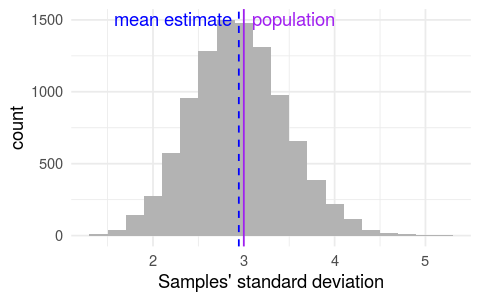

In [107]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate many many samples of 17 martian worms
K = 10000 # number of replications
n = 17 # sample size
s = vector("numeric", K) # initialize an empty vector where to store samples' SD

for (i in 1:K) {
    x = rnorm(n, mean = mu, sd = sigma)  # draw a random sample of n observations
    
    # Natural estimator
    s[i] = sqrt(mean((x-mean(x))^2))
    
    # Unbiased estimator
    s[i] = sqrt(n/(n-1))*s[i]
}

ggplot(data.frame(s = s), aes(x = s)) +
geom_histogram(binwidth = 0.2, center = 9, fill = "grey70") +
geom_vline(xintercept = sigma, color = "purple") +
geom_vline(xintercept = mean(s), color = "blue", linetype=2) +
annotate(geom = "text", label = "mean estimate", x = sigma, y = Inf, hjust = 1.1, vjust = 1.2, color = "blue") +
annotate(geom = "text", label = "population", x = sigma, y = Inf, hjust = -.1, vjust = 1.2, color = "purple") +
labs(x = "Samples' standard deviation")

mean(v)

# Confidence intervals

## Effect of sample size

[1] 9.007199

[1] 0.213487

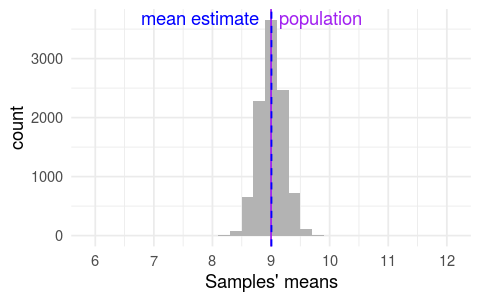

In [617]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate 1000 samples of 17 martian worms
N = 10000
n = 200
x_mean = vector("numeric", N)
for (i in 1:N) {
    x_mean[i] = mean(rnorm(n, mean = mu, sd = sigma))
}

ggplot(data.frame(x = x_mean), aes(x = x)) +
geom_histogram(binwidth = 0.2, center = 9, fill = "grey70") +
geom_vline(xintercept = mu, color = "purple") +
geom_vline(xintercept = mean(x_mean), color = "blue", linetype = 2) +
scale_x_continuous(breaks = seq(6,12)) + expand_limits(x=c(6,12)) +
annotate(geom = "text", label = "mean estimate", x = mu, y = Inf, hjust = 1.1, vjust = 1.1, color = "blue") +
annotate(geom = "text", label = "population", x = mu, y = Inf, hjust = -.1, vjust = 1.1, color = "purple") +
labs(x = "Samples' means")

mean(x_mean)
sd(x_mean)

## Bootstrapping method

In [23]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate 1 sample of 17 martian worms, and draw 10000 bootstrap samples from it
Nb = 10000
n = 17
x_mean = vector("numeric", Nb)
x = rnorm(n, mean = mu, sd = sigma)
for (i in 1:Nb) {
    x_resample = sample(x, n, replace = T)
    x_mean[i] = mean(x_resample)
}

quantile_025 = quantile(x_mean, .025)
quantile_975 = quantile(x_mean, .95)

ggplot(data.frame(x = x_mean), aes(x = x)) +
geom_histogram(binwidth = 0.1, center = 9, fill = "grey70") +
geom_vline(xintercept = mu, color = "purple") +
geom_vline(xintercept = quantile_025, color = "red") +
geom_vline(xintercept = quantile_975, color = "red") +
scale_x_continuous(breaks = seq(6,12)) + expand_limits(x=c(6,12)) +
annotate(geom = "text", label = "2.5%", x = quantile_025, y = Inf, hjust = 1.2, vjust = 1.1, color = "red") +
annotate(geom = "text", label = "97.5%", x = quantile_975, y = Inf, hjust = -.2, vjust = 1.1, color = "red") +
labs(x = "Means of bootstrap samples")


In [26]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We set a confidence level
conflvl = .95

# We simulate 1000 samples of 17 martian worms
# For each of them, we construct a confidence interval using 1000 bootstrap samples
N = 1000
Nb = 1000
n = 17
truemeanin = vector("numeric", N)
for (i in 1:N) {
    x = rnorm(n, mean = mu, sd = sigma)
    x_mean = vector("numeric", Nb)
    for (j in 1:Nb) {
        x_resample = sample(x, n, replace = T)
        x_mean[j] = mean(x_resample)
    }
    quantile_low = quantile(x_mean, (1-conflvl)/2)
    quantile_high = quantile(x_mean, 1-(1-conflvl)/2)
    if (quantile_low <= mu & mu <= quantile_high) {truemeanin[i] = 1}
}
    
mean(truemeanin) # we expect this to be close to conflvl = .95

[1] 0.931

## Standardization of a normal distribution

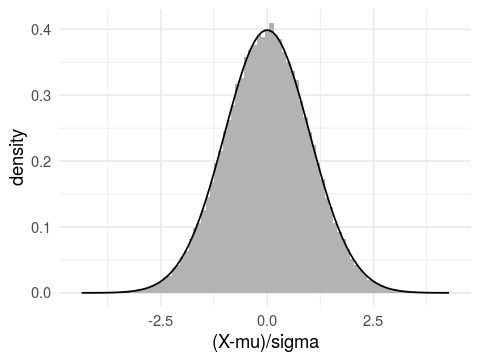

In [26]:
# We verify, using simulations, that if X ~ N(mu,sigma^2), then (X-mu)/sigma = Z, the standard normal distribution
mu = 4.25
sigma = 1.12
n = 100000

x = rnorm(n, mu, sigma)

options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data = data.frame(x = (x-mu)/sigma), aes(x = x)) +
geom_histogram(binwidth = 0.1, aes(y = after_stat(density)), fill = "grey70") +
stat_function(fun = dnorm) + # very convenient to plot a function directly, without creating a dataframe
labs(x = "(X-mu)/sigma")


## Convergence of t distributions towards Z

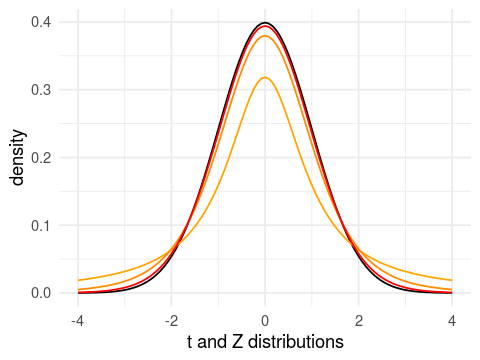

In [50]:
options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
stat_function(fun = dnorm, color = "black") +
stat_function(fun = dt, args = list(df = 1), color = "orange") +
stat_function(fun = dt, args = list(df = 5), color = "darkorange") +
stat_function(fun = dt, args = list(df = 20), color = "red") +
# stat_function(fun = dt, args = list(df = 30), color = "purple") +
labs(x = "t and Z distributions", y = "density")

## Confidence interval for the example

In [10]:
x = c(14.976, 7.04, 11.588, 14.46, 6.876, 9.258, 10.444, 5.425,  12.508, 11.844, 7.695, 4.642, 6.916, 2.947, 10.423, 9.558, 10.783)

summary(x)

n = length(x)
x_mean = mean(x)
s = sd(x)


conflvl = .95
confint_low = x_mean - qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)
confint_high = x_mean + qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)

c(confint_low, confint_high) %>% round(3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.947   6.916   9.558   9.258  11.588  14.976 

[1]  7.524 10.992

## Z quantiles

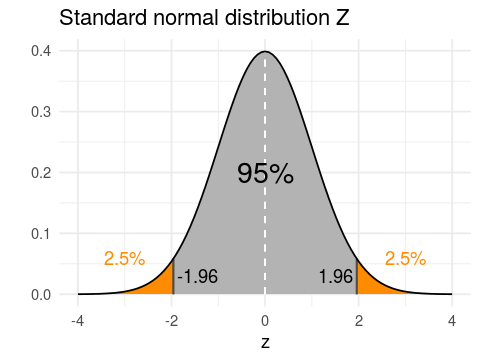

In [139]:
# Plot middle X% and corresponding quantiles on the standard normal distribution Z

conflvl = .95

loq = qnorm((1-conflvl)/2)
hiq = qnorm(1-(1-conflvl)/2)

options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data.frame(x = c(-4, 4)), aes(x)) +
stat_function(fun = dnorm, geom = "area", xlim = c(-4,loq), fill = "darkorange") +
stat_function(fun = dnorm, geom = "area", xlim = c(hiq,4), fill = "darkorange") +
stat_function(fun = dnorm, geom = "area", xlim = c(loq,hiq), fill = "grey70") +
geom_segment(x = 0, xend = 0, y = 0, yend = 0.4, linetype = 2, color = "white") +
geom_segment(x = loq, xend = loq, y = 0, yend = dnorm(loq), linetype = 1, color = "grey30") +
geom_segment(x = hiq, xend = hiq, y = 0, yend = dnorm(hiq), linetype = 1, color = "grey30") +
annotate(geom = "text", label = paste0(100*conflvl,"%"), x = 0, y = 0.2, size = 6) +
annotate(geom = "text", label = round(loq,2), x = loq, y = 0.03, hjust= -0.1) +
annotate(geom = "text", label = round(hiq,2), x = hiq, y = 0.03, hjust= 1.1) +
annotate(geom = "text", label = paste0(100*(1-conflvl)/2,"%"), x = -3, y = 0.06, hjust= .5, color="darkorange") +
annotate(geom = "text", label = paste0(100*(1-conflvl)/2,"%"), x = 3, y = 0.06, hjust= .5, color="darkorange") +
stat_function(fun = dnorm) + 
labs(title = "Standard normal distribution Z", x = "z", y ="") 
# theme(axis.text = element_blank())

In [200]:
# Create the Z quantiles table
conflvls = c(.50,.75,.90,.95,.99,.999)
qnorm(1-(1-conflvls)/2)

[1] 0.6744898 1.1503494 1.6448536 1.9599640 2.5758293 3.2905267

## T quantiles

In [43]:
qt(0.025, df =16)

[1] -2.119905

In [211]:
# Create the T quantiles tables
conflvls = c(.50,.75,.90,.95,.99,.999)

for (df in seq(5,100,5)) {
    print(qt(1-(1-conflvls)/2, df=df))
}

[1] 0.7266868 1.3009490 2.0150484 2.5705818 4.0321430 6.8688266
[1] 0.6998121 1.2212554 1.8124611 2.2281389 3.1692727 4.5868939
[1] 0.6911969 1.1966893 1.7530504 2.1314495 2.9467129 4.0727652
[1] 0.6869545 1.1847614 1.7247182 2.0859634 2.8453397 3.8495163
[1] 0.684430 1.177716 1.708141 2.059539 2.787436 3.725144
[1] 0.6827557 1.1730649 1.6972609 2.0422725 2.7499957 3.6459586
[1] 0.6815641 1.1697649 1.6895725 2.0301079 2.7238056 3.5911468
[1] 0.6806727 1.1673020 1.6838510 2.0210754 2.7044593 3.5509658
[1] 0.6799808 1.1653936 1.6794274 2.0141034 2.6895850 3.5202515
[1] 0.6794282 1.1638714 1.6759050 2.0085591 2.6777933 3.4960129
[1] 0.6789766 1.1626289 1.6730340 2.0040448 2.6682160 3.4763984
[1] 0.6786007 1.1615955 1.6706489 2.0002978 2.6602830 3.4602005
[1] 0.6782829 1.1607226 1.6686360 1.9971379 2.6536045 3.4465984
[1] 0.6780107 1.1599754 1.6669145 1.9944371 2.6479046 3.4350145
[1] 0.677775 1.159329 1.665425 1.992102 2.642983 3.425031
[1] 0.6775688 1.1587632 1.6641246 1.9900634 2.638690

## Simulate and check the 95% confidence interval for known variance

In [42]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We set a confidence level
conflvl = .95

# We simulate many many samples of 17 martian worms
# For each of them, we construct a confidence interval using the mathematical formula we derived
K = 10000
n = 17
truemeanin = vector("numeric", K)

for (i in 1:K) {
    x = rnorm(n, mean = mu, sd = sigma)
    x_mean = mean(x)
    
    confint_low = x_mean - qnorm(1-(1-conflvl)/2)*sigma/sqrt(n)
    confint_high = x_mean + qnorm(1-(1-conflvl)/2)*sigma/sqrt(n)
    
    if (confint_low <= mu & mu <= confint_high) {truemeanin[i] = 1}
}
    
mean(truemeanin) # we expect this to be close to conflvl

[1] 0.9541

## Simulate and check the 95% confidence interval for unknown variance

In [49]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We set a confidence level
conflvl = .95

# We simulate many many samples of 17 martian worms
# For each of them, we construct a confidence interval using the mathematical formula we derived
K = 10000
n = 10
truemeanin = vector("numeric", K)
for (i in 1:K) {
    x = rnorm(n, mean = mu, sd = sigma)
    x_mean = mean(x)
    s = sd(x)
    
#     # Based on Student's t distribution
#     confint_low = x_mean - qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)
#     confint_high = x_mean + qt(1-(1-conflvl)/2, df=n-1)*s/sqrt(n)
    
    # Base on the Z approximation
    confint_low = x_mean - qnorm(1-(1-conflvl)/2)*s/sqrt(n)
    confint_high = x_mean + qnorm(1-(1-conflvl)/2)*s/sqrt(n)
    
    if (confint_low <= mu & mu <= confint_high) {truemeanin[i] = 1}
}

mean(truemeanin) # we expect this to be close to conflvl

[1] 0.9185

## Bernoulli variable

In [50]:
n = 50
conflvl = .95
z = qnorm(1-(1-conflvl)/2)
x_mean = 28/50

n/(n+z^2)*(x_mean + z^2/(2*n) - z*sqrt(x_mean*(1-x_mean)/n + z^2/(4*n^2)))
n/(n+z^2)*(x_mean + z^2/(2*n) + z*sqrt(x_mean*(1-x_mean)/n + z^2/(4*n^2)))

[1] 0.4230603

[1] 0.688378

## Bootstrapping method for Bernoulli

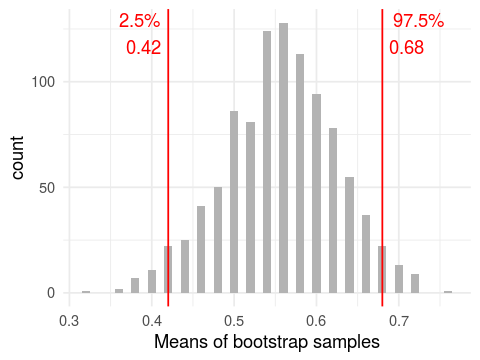

In [61]:
# Our sample
n = 50
n_heads = 28
x = c(rep(1,n_heads),rep(0,n-n_heads))

# We draw 10000 bootstrap samples from our sample
Nb = 1000
x_mean = vector("numeric", Nb)
for (i in 1:Nb) {
    x_resample = sample(x, n, replace = T)
    x_mean[i] = mean(x_resample)
}

quantile_025 = quantile(x_mean, .025)
quantile_975 = quantile(x_mean, .975)

options(repr.plot.width = 4, repr.plot.height = 3)

ggplot(data.frame(x = x_mean), aes(x = x)) +
geom_histogram(binwidth = 0.01, center = 9, fill = "grey70") +
# geom_vline(xintercept = mu, color = "purple") +
geom_vline(xintercept = quantile_025, color = "red") +
geom_vline(xintercept = quantile_975, color = "red") +
# scale_x_continuous(breaks = seq(6,12)) + expand_limits(x=c(6,12)) +
annotate(geom = "text", label = paste0("2.5%\n",round(quantile_025,2)),
         x = quantile_025, y = Inf, hjust = 1.2, vjust = 1.1, color = "red") +
annotate(geom = "text", label = paste0("97.5%\n",round(quantile_975,2)),
         x = quantile_975, y = Inf, hjust = -.2, vjust = 1.1, color = "red") +
labs(x = "Means of bootstrap samples")


## Two-sample

### Paired

In [145]:
x1 = c(14.976, 7.040, 11.588, 14.460, 6.876, 9.258, 10.444, 5.425, 12.508, 11.844, 7.695, 4.642, 6.916, 2.947, 10.423, 9.558, 10.783)
x2 = c(17.619, 9.600, 14.855, 16.582, 10.785, 12.008, 13.224, 7.091, 15.345, 14.157, 9.534, 8.673, 10.500, 5.916, 15.358, 9.975, 14.130)
x2-x1


[1] 2.643 2.560 3.267 2.122 3.909 2.750 2.780 1.666 2.837 2.313 1.839 4.031
[13] 3.584 2.969 4.935 0.417 3.347

## Bootstrapping method

In [23]:
# We assume the following parameters for the underlying population
mu = 9 # in mm
sigma = 3 # in mm

# We simulate 1 sample of 17 martian worms, and draw 10000 bootstrap samples from it
Nb = 10000
n = 17
x_mean = vector("numeric", Nb)
x = rnorm(n, mean = mu, sd = sigma)
for (i in 1:Nb) {
    x_resample = sample(x, n, replace = T)
    x_mean[i] = mean(x_resample)
}

quantile_025 = quantile(x_mean, .025)
quantile_975 = quantile(x_mean, .95)

ggplot(data.frame(x = x_mean), aes(x = x)) +
geom_histogram(binwidth = 0.1, center = 9, fill = "grey70") +
geom_vline(xintercept = mu, color = "purple") +
geom_vline(xintercept = quantile_025, color = "red") +
geom_vline(xintercept = quantile_975, color = "red") +
scale_x_continuous(breaks = seq(6,12)) + expand_limits(x=c(6,12)) +
annotate(geom = "text", label = "2.5%", x = quantile_025, y = Inf, hjust = 1.2, vjust = 1.1, color = "red") +
annotate(geom = "text", label = "97.5%", x = quantile_975, y = Inf, hjust = -.2, vjust = 1.1, color = "red") +
labs(x = "Means of bootstrap samples")


# **Convert this notebook to R markdown**

In [63]:
library(rmarkdown)
input = "1-02.ipynb"
rmarkdown:::convert_ipynb(input, output = xfun::with_ext(input, "Rmd"))